<a href="https://colab.research.google.com/github/MohanZhu0623/Sentiment_Analysis/blob/main/Apply_model_to_data%26Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_path = '/content/drive/My Drive/trained_roberta_model'

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [ ]:
def predict_single(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=-1).item()
    return predicted_class_id


In [ ]:
text = "Publishing and creating unique poems to bring awareness to the creative work and artistry involved with writing poetry."
prediction = predict_single(text, model, tokenizer)
print("Predicted class:", prediction)

Predicted class: 1


In [ ]:
def predict_batch(texts, model, tokenizer, batch_size=16):
    all_predictions = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        logits = outputs.logits
        predicted_class_ids = torch.argmax(logits, dim=-1).cpu().numpy()
        all_predictions.extend(predicted_class_ids)
    return all_predictions

In [ ]:
import pandas as pd
df = pd.read_excel('/content/sucess10000.xlsx')

In [ ]:
texts = df['text'].tolist()

In [ ]:
predictions = predict_batch(texts, model, tokenizer)

In [ ]:
df['sentiment'] = [pred - 1 for pred in predictions]

In [ ]:
print(df['sentiment'].value_counts())

sentiment
 1    4273
 0    3838
-1    1889
Name: count, dtype: int64


In [ ]:
output_path = '/content/drive/My Drive/your_dataset_with_predictions10000.xlsx'
df.to_excel(output_path, index=False)

In [ ]:
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_path = '/content/20000data.xlsx'
df = pd.read_excel(file_path)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Number_of_Projects_in_Each_Category
category_counts = df['category'].value_counts()
print("number_of_each_category：")
print(category_counts)

number_of_each_category：
category
Film & Video    2438
Music           2391
Technology      2308
Publishing      1974
Art             1943
Food            1668
Games           1150
Fashion         1091
Photography      855
Design           803
Comics           703
Crafts           667
Journalism       600
web              587
Theater          562
Dance            260
Name: count, dtype: int64


<ipython-input-49-732bee563885>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


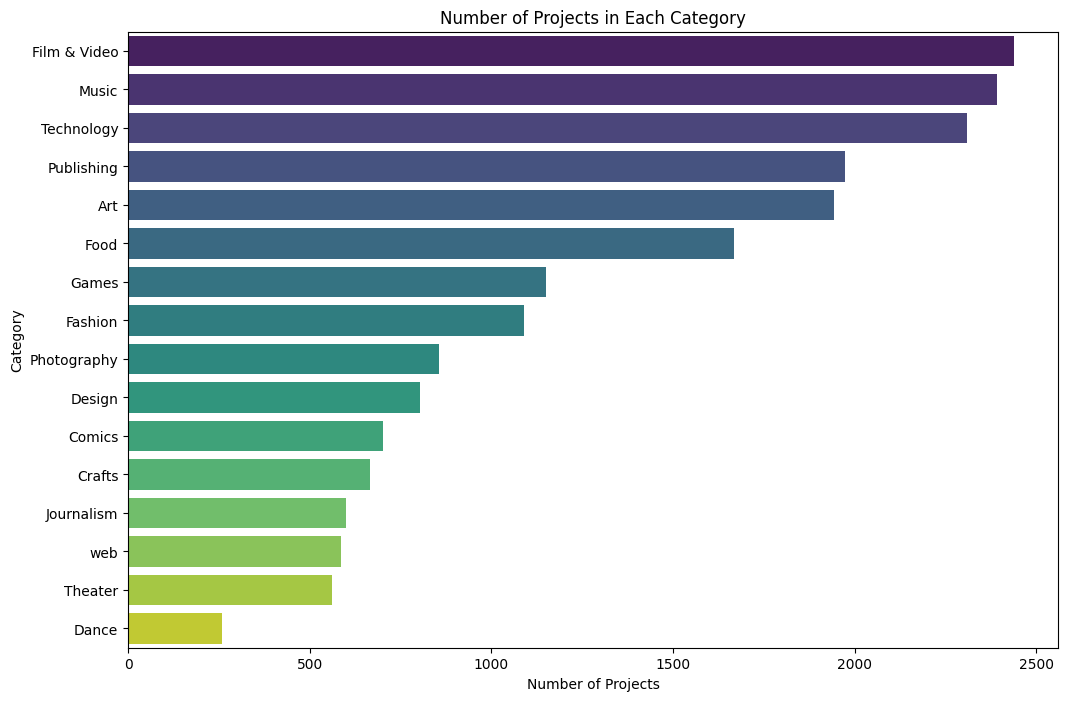

In [ ]:
# Visualization_Number_of_Projects_in_Each_Category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title('Number of Projects in Each Category')
plt.xlabel('Number of Projects')
plt.ylabel('Category')
plt.show()

In [ ]:
# each_category_state_successful_ratio
successful_counts = df[df['state'] == 'successful']['category'].value_counts()
total_counts = df['category'].value_counts()
successful_ratio = successful_counts / total_counts
successful_ratio = successful_ratio.fillna(0)

In [ ]:
print("\neach_category_successful_ratio：")
print(successful_ratio)


each_category_successful_ratio：
category
Art             0.449305
Comics          0.839260
Crafts          0.298351
Dance           0.623077
Design          0.556663
Fashion         0.572869
Film & Video    0.543478
Food            0.252398
Games           0.553913
Journalism      0.218333
Music           0.580510
Photography     0.385965
Publishing      0.600811
Technology      0.345321
Theater         0.590747
web             0.948893
Name: count, dtype: float64


<ipython-input-55-6860b911e5cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=successful_ratio.values, y=successful_ratio.index, palette="viridis")


Text(0, 0.5, 'Category')

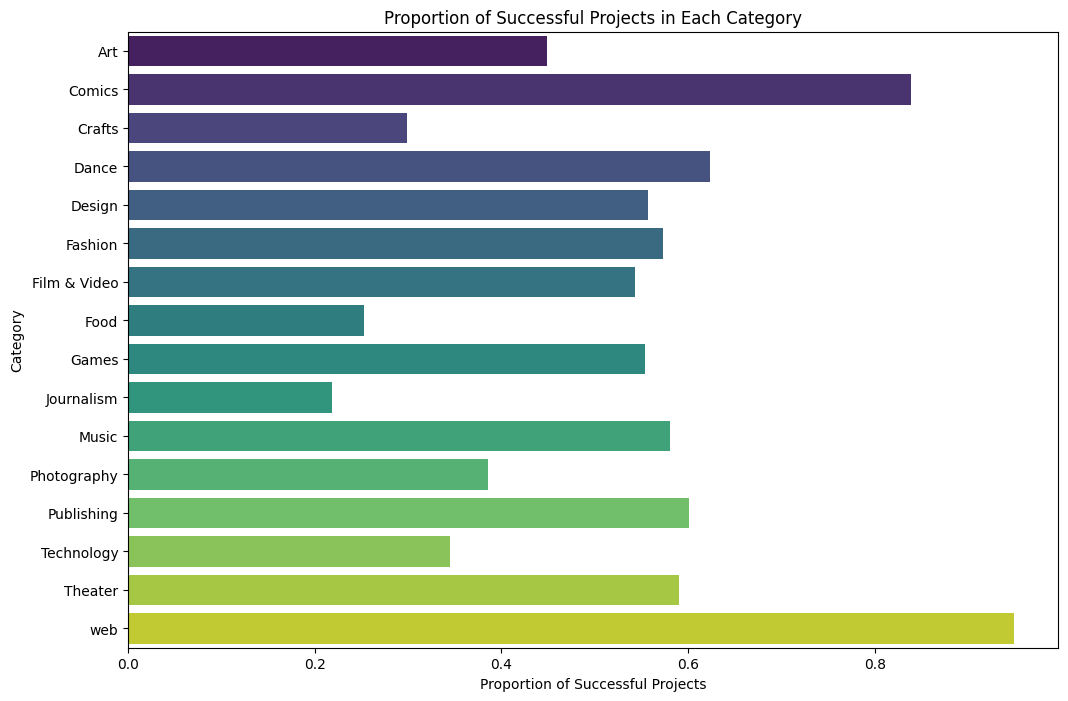

In [ ]:
# Visualization_each_category_state_successful_ratio
plt.figure(figsize=(12, 8))
sns.barplot(x=successful_ratio.values, y=successful_ratio.index, palette="viridis")
plt.title('Proportion of Successful Projects in Each Category')
plt.xlabel('Proportion of Successful Projects')
plt.ylabel('Category')


In [ ]:
# each_category_sentiment_proportion
sentiment_counts = df.groupby('category')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
sentiment_counts.columns = ['sentiment_-1', 'sentiment_0', 'sentiment_1']

print("\neach_category_pos_ratio：")
print(sentiment_counts['sentiment_1'])

print("\neach_category_neu_ratio：")
print(sentiment_counts['sentiment_0'])

print("\nneach_category_neg_ratio：")
print(sentiment_counts['sentiment_-1'])


each_category_pos_ratio：
category
Art             0.403500
Comics          0.179232
Crafts          0.721139
Dance           0.496154
Design          0.653798
Fashion         0.782768
Film & Video    0.191961
Food            0.770384
Games           0.459130
Journalism      0.378333
Music           0.471351
Photography     0.373099
Publishing      0.331814
Technology      0.572357
Theater         0.320285
web             0.495741
Name: sentiment_1, dtype: float64

each_category_neu_ratio：
category
Art             0.517756
Comics          0.348506
Crafts          0.260870
Dance           0.430769
Design          0.316314
Fashion         0.196150
Film & Video    0.267022
Food            0.217626
Games           0.380000
Journalism      0.481667
Music           0.484316
Photography     0.525146
Publishing      0.448328
Technology      0.409879
Theater         0.427046
web             0.374787
Name: sentiment_0, dtype: float64

neach_category_neg_ratio：
category
Art             0.078744
C

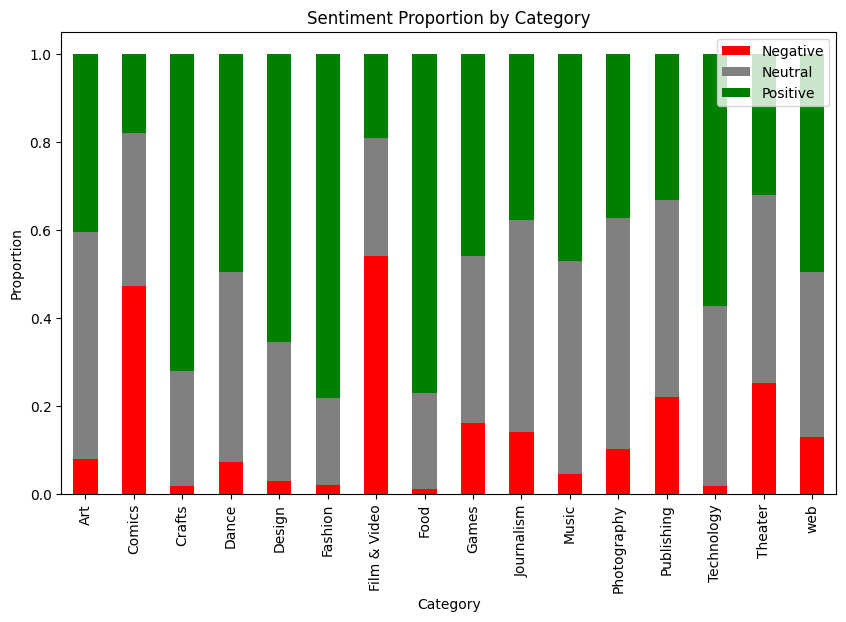

In [ ]:
import matplotlib.pyplot as plt

# Visualization_each_category_sentiment_proportion
fig, ax = plt.subplots(figsize=(10, 6))

sentiment_counts.plot(kind='bar', stacked=True, ax=ax, color=['red', 'gray', 'green'])

ax.set_title('Sentiment Proportion by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.legend(['Negative', 'Neutral', 'Positive'], loc='upper right')

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
# Make sure you have downloaded the stopwords list
nltk.download('stopwords')

# Define preprocessing function
def pre_process_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra spaces
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    # Remove stopwords (except 'not')
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Preprocess text and calculate word count for each row
df['processed_text'] = df['text'].apply(pre_process_text)
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))

# Display the first few rows
print(df[['text', 'processed_text', 'word_count']].head())

# Save the result
output_path = '/content/drive/My Drive/processed_dataset_with_word_count.csv'
df.to_csv(output_path, index=False)

# Generate download link
from google.colab import files
files.download(output_path)

                                                text  \
0  This project is designed to help protect the e...   
1  Help us built a sustainable studio & eliminate...   
2  "If I paint something, I don't want to have to...   
3  Our free app will allow you pool reservations ...   
4  Prohibition themed Gastro Pub and After Dark S...   

                                      processed_text  word_count  
0  project designed help protect environment usin...           9  
1  help us built sustainable studio eliminate cla...          17  
2  paint something dont want explain isbob ross b...          11  
3  free app allow pool reservations others get gr...          14  
4  prohibition themed gastro pub dark silent head...           9  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read the dataset
file_path = '/content/20000text(WC).xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

<ipython-input-66-e1f091e13826>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_word_count_mean.values, y=category_word_count_mean.index, palette="viridis")


Text(0, 0.5, 'Category')

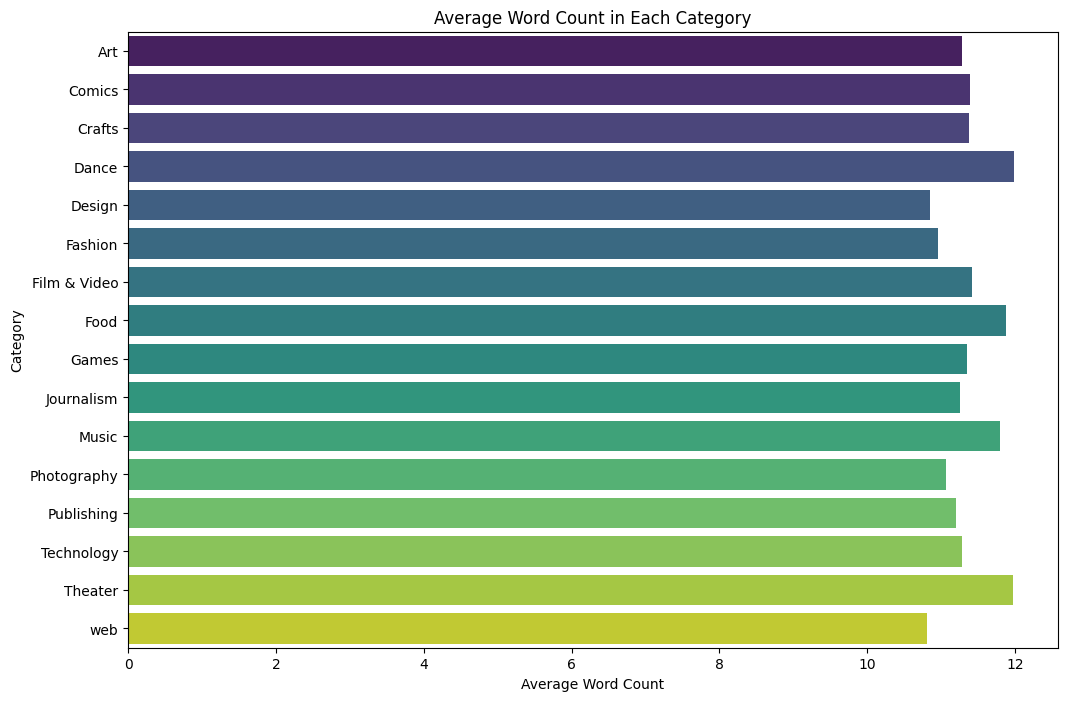

In [ ]:
# Calculate the average word count for each category
category_word_count_mean = df.groupby('category')['word_count'].mean()

# Visualize the average word count for each category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_word_count_mean.values, y=category_word_count_mean.index, palette="viridis")
plt.title('Average Word Count in Each Category')
plt.xlabel('Average Word Count')
plt.ylabel('Category')

<ipython-input-67-aeb101ca6481>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_goal_mean.values, y=category_goal_mean.index, palette="viridis")


Text(0, 0.5, 'Category')

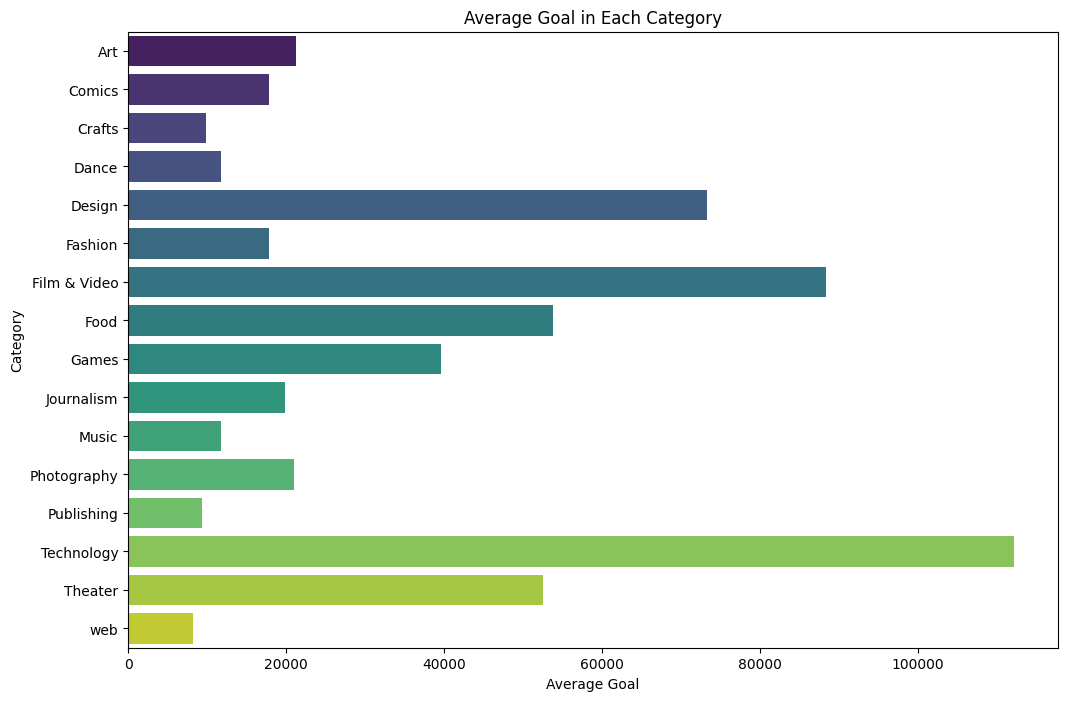

In [ ]:
# Calculate the average goal for each category
category_goal_mean = df.groupby('category')['goal'].mean()

# Visualize the average goal for each category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_goal_mean.values, y=category_goal_mean.index, palette="viridis")
plt.title('Average Goal in Each Category')
plt.xlabel('Average Goal')
plt.ylabel('Category')

<ipython-input-69-040b7fe865a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_word_count_mean.index, y=state_word_count_mean.values, palette="viridis")


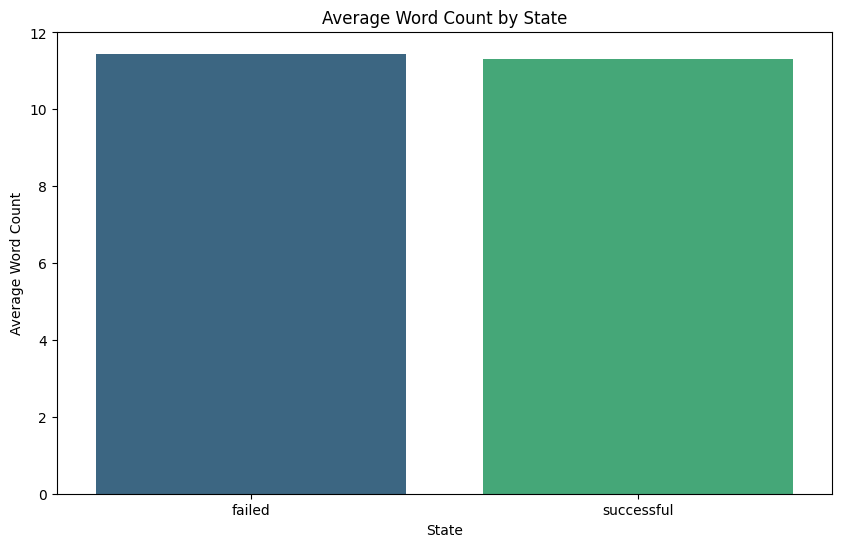

In [ ]:
# Calculate the average word count for each state
state_word_count_mean = df.groupby('state')['word_count'].mean()

# Visualize the average word count for each state
plt.figure(figsize=(10, 6))
sns.barplot(x=state_word_count_mean.index, y=state_word_count_mean.values, palette="viridis")
plt.title('Average Word Count by State')
plt.xlabel('State')
plt.ylabel('Average Word Count')
plt.show()

<ipython-input-70-9b3a0360adb6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_goal_mean.index, y=state_goal_mean.values, palette="viridis")


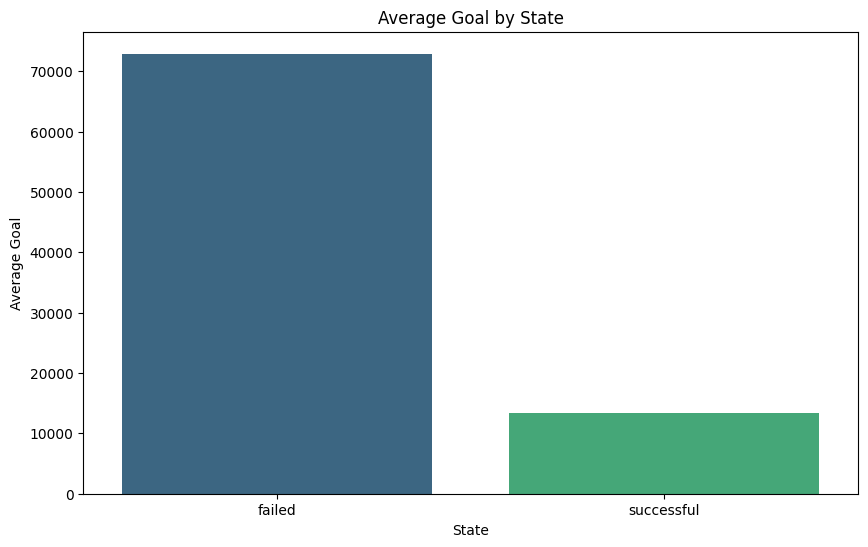

In [ ]:
# Calculate the average goal for each state
state_goal_mean = df.groupby('state')['goal'].mean()

# Visualize the average goal for each state
plt.figure(figsize=(10, 6))
sns.barplot(x=state_goal_mean.index, y=state_goal_mean.values, palette="viridis")
plt.title('Average Goal by State')
plt.xlabel('State')
plt.ylabel('Average Goal')
plt.show()

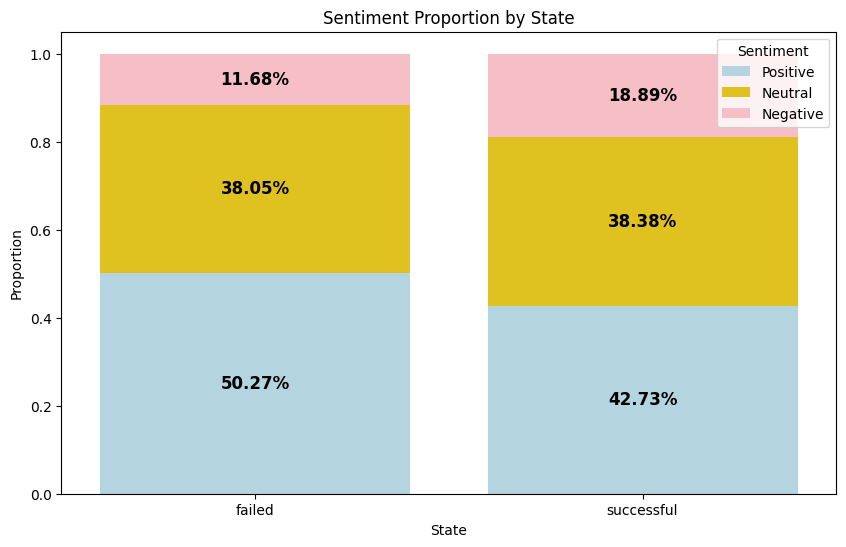

In [ ]:
# Calculate sentiment proportion for each state
sentiment_counts_state = df.groupby('state')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
sentiment_counts_state.columns = ['sentiment_-1', 'sentiment_0', 'sentiment_1']

# Plot sentiment proportions for each state
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts_state.index, y=sentiment_counts_state['sentiment_1'], color='#ADD8E6', label='Positive')  # Light Blue
sns.barplot(x=sentiment_counts_state.index, y=sentiment_counts_state['sentiment_0'], color='#FFD700', label='Neutral', bottom=sentiment_counts_state['sentiment_1'])  # Light Yellow
sns.barplot(x=sentiment_counts_state.index, y=sentiment_counts_state['sentiment_-1'], color='#FFB6C1', label='Negative', bottom=sentiment_counts_state['sentiment_1'] + sentiment_counts_state['sentiment_0'])  # Light Pink

# Add percentage labels
for i in range(len(sentiment_counts_state)):
    total = sentiment_counts_state.iloc[i].sum()
    pos = sentiment_counts_state.iloc[i]['sentiment_1']
    neu = sentiment_counts_state.iloc[i]['sentiment_0']
    neg = sentiment_counts_state.iloc[i]['sentiment_-1']
    plt.text(i, pos / 2, f'{pos * 100:.2f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
    plt.text(i, pos + neu / 2, f'{neu * 100:.2f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
    plt.text(i, pos + neu + neg / 2, f'{neg * 100:.2f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title('Sentiment Proportion by State')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

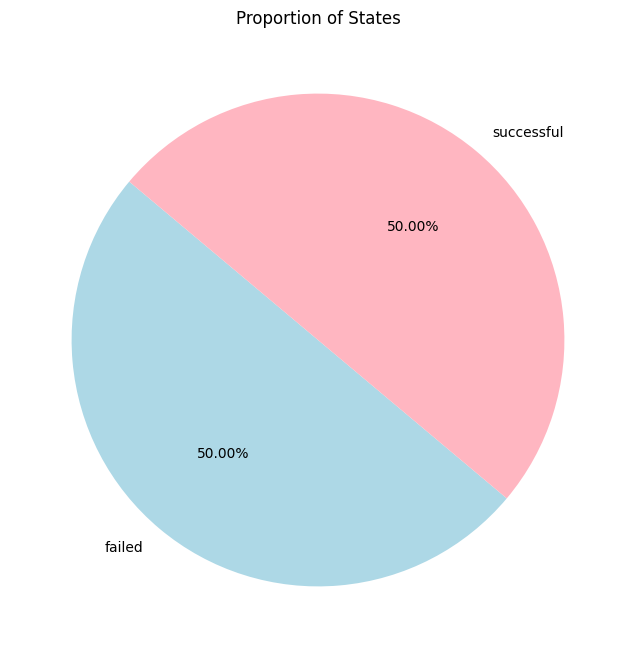

In [ ]:
# Calculate the proportion of each state
state_counts = df['state'].value_counts(normalize=True)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.2f%%', colors=['#ADD8E6', '#FFB6C1'], startangle=140)
plt.title('Proportion of States')
plt.show()

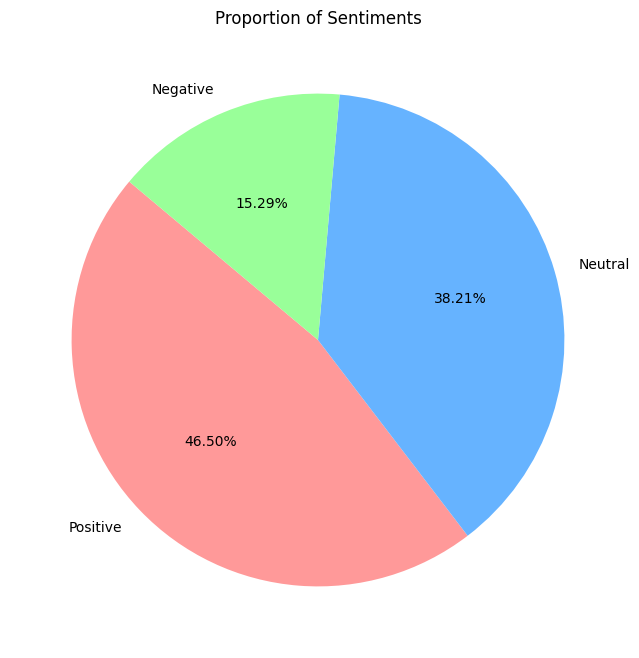

In [ ]:
# Calculate the proportion of each sentiment
sentiment_counts = df['sentiment'].value_counts(normalize=True)

# Define the colors for each sentiment
colors = ['#FF9999', '#66B3FF', '#99FF99']  # Light Red for Negative, Light Blue for Neutral, Light Green for Positive

# Map the sentiment values to labels
labels = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
sentiment_labels = [labels[i] for i in sentiment_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.2f%%', colors=colors, startangle=140)
plt.title('Proportion of Sentiments')
plt.show()

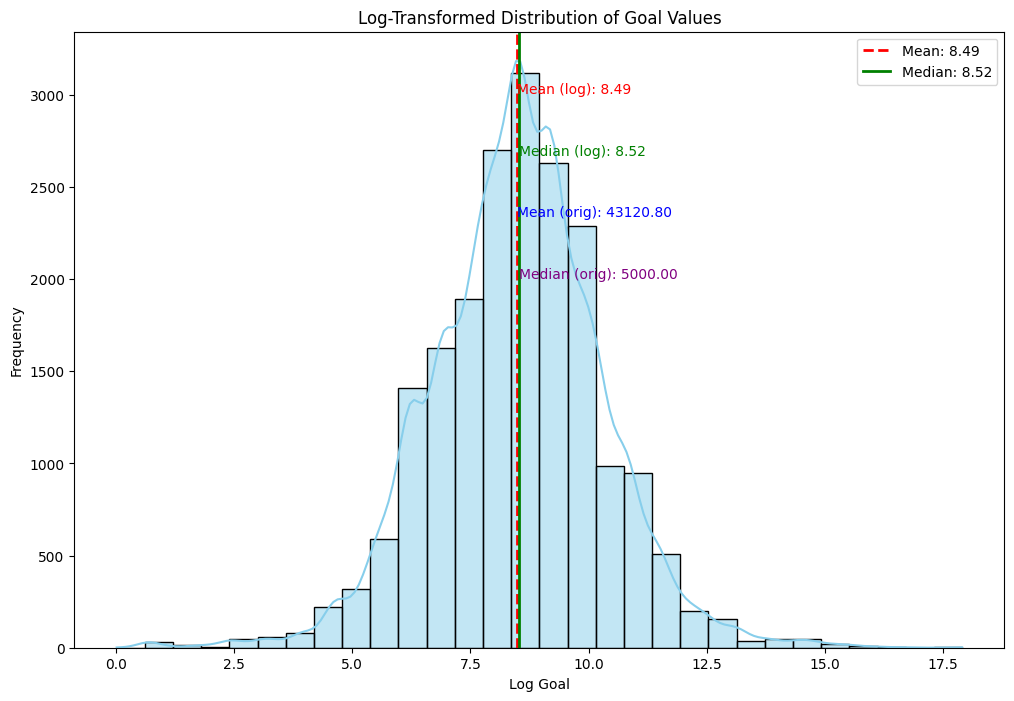

In [ ]:
import numpy as np
# Calculate mean and median of original 'goal' column
mean_goal = df['goal'].mean()
median_goal = df['goal'].median()

# Apply log transformation to the 'goal' column
df['log_goal'] = np.log1p(df['goal'])  # 使用 log(1 + goal) 以避免 log(0) 的情况

# Calculate mean and median of the log-transformed 'goal'
mean_log_goal = df['log_goal'].mean()
median_log_goal = df['log_goal'].median()

# Plot the distribution of the log-transformed 'goal' column
plt.figure(figsize=(12, 8))
sns.histplot(df['log_goal'], bins=30, kde=True, color='skyblue')
plt.axvline(mean_log_goal, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_log_goal:.2f}')
plt.axvline(median_log_goal, color='green', linestyle='-', linewidth=2, label=f'Median: {median_log_goal:.2f}')

# Annotate the mean and median on the plot
plt.text(mean_log_goal, plt.ylim()[1]*0.9, f'Mean (log): {mean_log_goal:.2f}', color='red', ha='left')
plt.text(median_log_goal, plt.ylim()[1]*0.8, f'Median (log): {median_log_goal:.2f}', color='green', ha='left')

# Annotate the original mean and median on the plot
plt.text(mean_log_goal, plt.ylim()[1]*0.7, f'Mean (orig): {mean_goal:.2f}', color='blue', ha='left')
plt.text(median_log_goal, plt.ylim()[1]*0.6, f'Median (orig): {median_goal:.2f}', color='purple', ha='left')

plt.title('Log-Transformed Distribution of Goal Values')
plt.xlabel('Log Goal')
plt.ylabel('Frequency')
plt.legend()
plt.show()

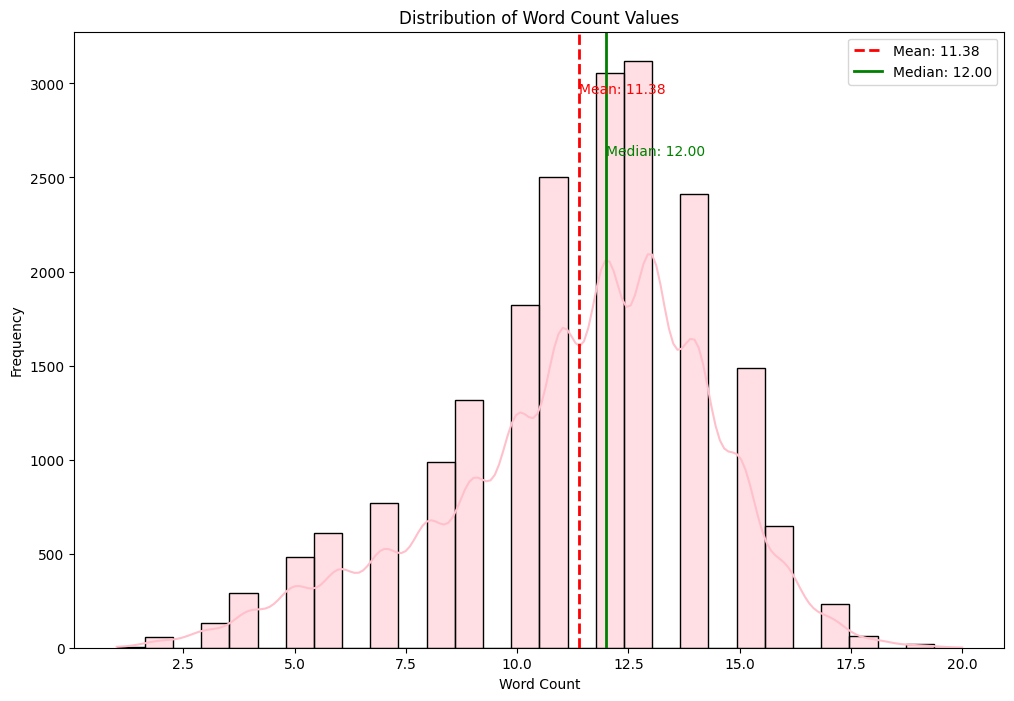

In [ ]:
# Calculate mean and median of 'word_count' column
mean_word_count = df['word_count'].mean()
median_word_count = df['word_count'].median()

# Plot the distribution of the 'word_count' column
plt.figure(figsize=(12, 8))
sns.histplot(df['word_count'], bins=30, kde=True, color='pink')
plt.axvline(mean_word_count, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_word_count:.2f}')
plt.axvline(median_word_count, color='green', linestyle='-', linewidth=2, label=f'Median: {median_word_count:.2f}')

# Annotate the mean and median on the plot
plt.text(mean_word_count, plt.ylim()[1]*0.9, f'Mean: {mean_word_count:.2f}', color='red', ha='left')
plt.text(median_word_count, plt.ylim()[1]*0.8, f'Median: {median_word_count:.2f}', color='green', ha='left')

plt.title('Distribution of Word Count Values')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

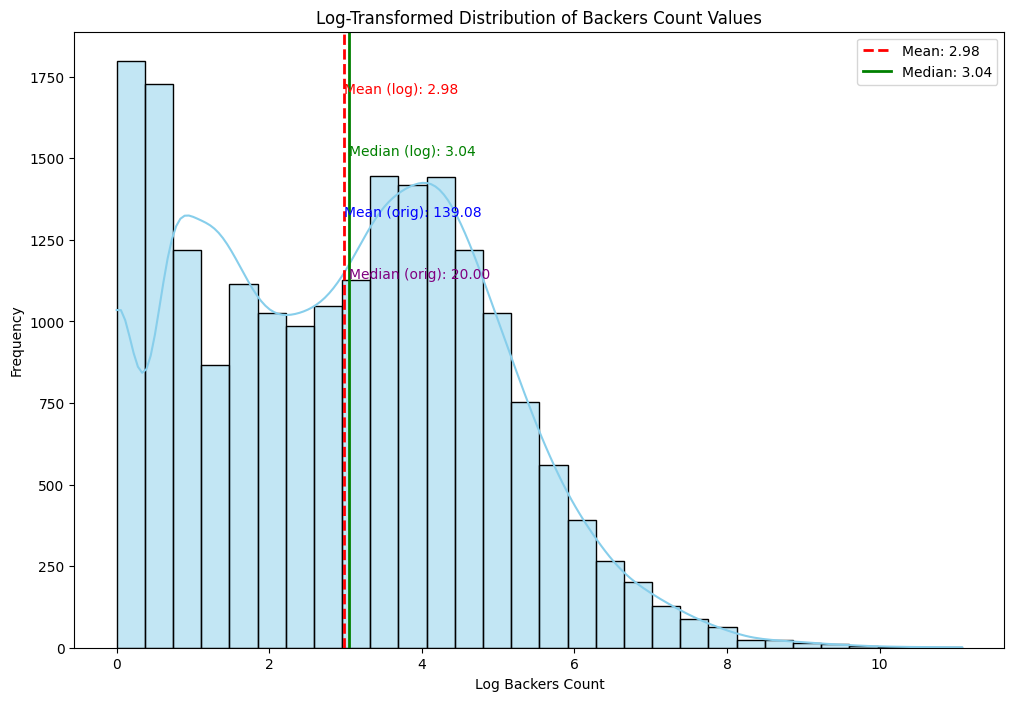

In [ ]:
import numpy as np

mean_backers_count = df['backers_count'].mean()
median_backers_count = df['backers_count'].median()

df['log_backers_count'] = np.log1p(df['backers_count'])

mean_log_backers_count = df['log_backers_count'].mean()
median_log_backers_count = df['log_backers_count'].median()

plt.figure(figsize=(12, 8))
sns.histplot(df['log_backers_count'], bins=30, kde=True, color='skyblue')
plt.axvline(mean_log_backers_count, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_log_backers_count:.2f}')
plt.axvline(median_log_backers_count, color='green', linestyle='-', linewidth=2, label=f'Median: {median_log_backers_count:.2f}')

# Annotate the mean and median on the plot
plt.text(mean_log_backers_count, plt.ylim()[1]*0.9, f'Mean (log): {mean_log_backers_count:.2f}', color='red', ha='left')
plt.text(median_log_backers_count, plt.ylim()[1]*0.8, f'Median (log): {median_log_backers_count:.2f}', color='green', ha='left')

# Annotate the original mean and median on the plot
plt.text(mean_log_backers_count, plt.ylim()[1]*0.7, f'Mean (orig): {mean_backers_count:.2f}', color='blue', ha='left')
plt.text(median_log_backers_count, plt.ylim()[1]*0.6, f'Median (orig): {median_backers_count:.2f}', color='purple', ha='left')

plt.title('Log-Transformed Distribution of Backers Count Values')
plt.xlabel('Log Backers Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

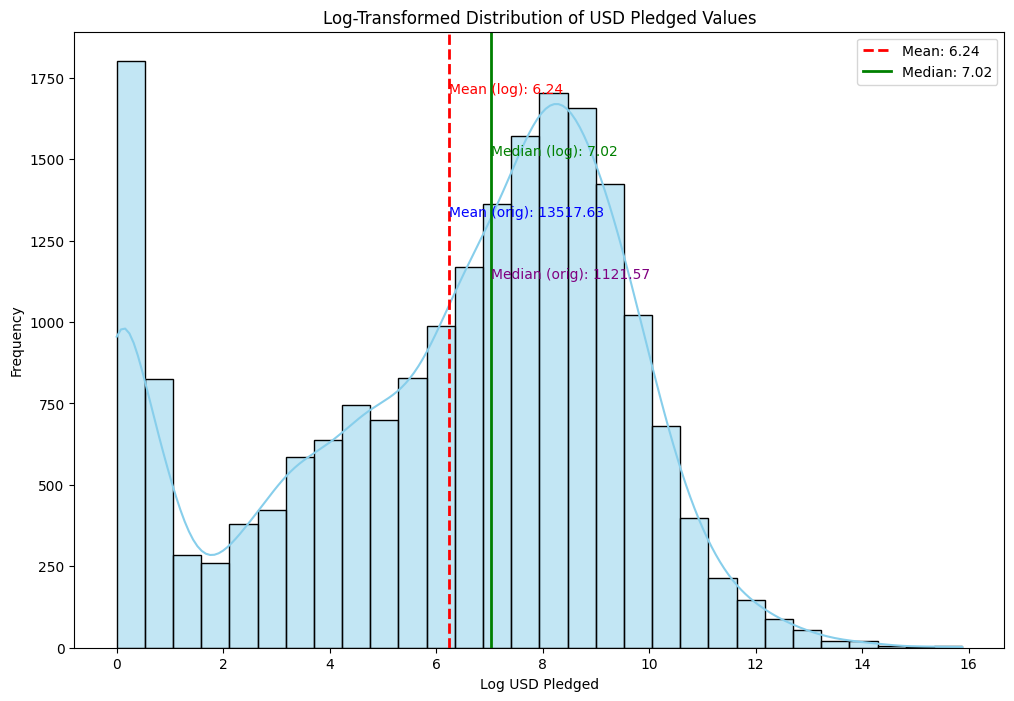

In [ ]:
mean_usd_pledged = df['usd_pledged'].mean()
median_usd_pledged = df['usd_pledged'].median()

df['log_usd_pledged'] = np.log1p(df['usd_pledged'])

mean_log_usd_pledged = df['log_usd_pledged'].mean()
median_log_usd_pledged = df['log_usd_pledged'].median()

plt.figure(figsize=(12, 8))
sns.histplot(df['log_usd_pledged'], bins=30, kde=True, color='skyblue')
plt.axvline(mean_log_usd_pledged, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_log_usd_pledged:.2f}')
plt.axvline(median_log_usd_pledged, color='green', linestyle='-', linewidth=2, label=f'Median: {median_log_usd_pledged:.2f}')

plt.text(mean_log_usd_pledged, plt.ylim()[1]*0.9, f'Mean (log): {mean_log_usd_pledged:.2f}', color='red', ha='left')
plt.text(median_log_usd_pledged, plt.ylim()[1]*0.8, f'Median (log): {median_log_usd_pledged:.2f}', color='green', ha='left')


plt.text(mean_log_usd_pledged, plt.ylim()[1]*0.7, f'Mean (orig): {mean_usd_pledged:.2f}', color='blue', ha='left')
plt.text(median_log_usd_pledged, plt.ylim()[1]*0.6, f'Median (orig): {median_usd_pledged:.2f}', color='purple', ha='left')

plt.title('Log-Transformed Distribution of USD Pledged Values')
plt.xlabel('Log USD Pledged')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
print(df.columns)

Index(['text', 'backers_count', 'goal', 'usd_pledged', 'state', 'category',
       'processed_text', 'word_count', 'log_backers_count', 'log_usd_pledged',
       'log_goal', 'sentiment_-1', 'sentiment_0', 'sentiment_1', 'WC_mc',
       'WC_mc_sq'],
      dtype='object')


In [ ]:
# Convert sentiment to dummy variables
df = pd.get_dummies(df, columns=['sentiment'], prefix='sentiment')
# Convert state to binary variable
df['state'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0)
df['WC_mc'] = df['word_count'] - df['word_count'].mean()
df['WC_mc_sq'] = df['WC_mc'] ** 2

Descriptive Statistics:
       backers_count          goal   usd_pledged         state   word_count  \
count   20000.000000  2.000000e+04  2.000000e+04  20000.000000  20000.00000   
mean      139.076050  4.312080e+04  1.351763e+04      0.500000     11.37970   
std       968.198063  6.456712e+05  1.260256e+05      0.500013      2.96327   
min         0.000000  1.000000e-02  0.000000e+00      0.000000      1.00000   
25%         3.000000  1.500000e+03  5.500000e+01      0.000000     10.00000   
50%        20.000000  5.000000e+03  1.121571e+03      0.500000     12.00000   
75%        79.000000  1.500000e+04  5.800000e+03      1.000000     13.00000   
max     64867.000000  6.000000e+07  7.850867e+06      1.000000     20.00000   

       log_backers_count  log_usd_pledged      log_goal         WC_mc  \
count       20000.000000     20000.000000  20000.000000  2.000000e+04   
mean            2.979272         6.235363      8.487147  2.955858e-16   
std             1.911732         3.280274    

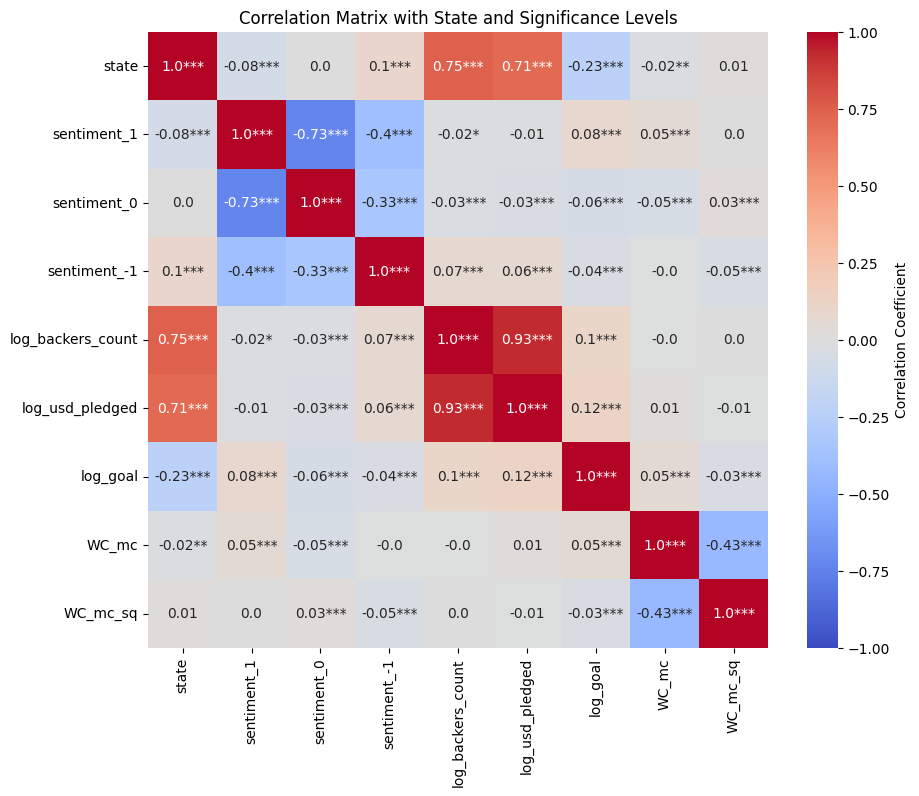

Descriptive Analysis:
              state      log_goal   word_count
count  20000.000000  20000.000000  20000.00000
mean       0.500000      8.487147     11.37970
std        0.500013      1.804992      2.96327
min        0.000000      0.009950      1.00000
25%        0.000000      7.313887     10.00000
50%        0.500000      8.517393     12.00000
75%        1.000000      9.615872     13.00000
max        1.000000     17.909855     20.00000
DataFrame columns:
Index(['text', 'backers_count', 'goal', 'usd_pledged', 'state', 'category',
       'processed_text', 'word_count', 'log_backers_count', 'log_usd_pledged',
       'log_goal', 'sentiment_-1', 'sentiment_0', 'sentiment_1', 'WC_mc',
       'WC_mc_sq', 'log_goal_scaled', 'word_count_scaled'],
      dtype='object')


In [ ]:
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

def corr_with_pvalues(df):
    df_corr = df.corr()
    df_pvals = pd.DataFrame(index=df_corr.index, columns=df_corr.columns)
    for row in df_corr.index:
        for col in df_corr.columns:
            _, pval = pearsonr(df[row], df[col])
            df_pvals.loc[row, col] = pval
    return df_corr, df_pvals

df['log_goal_scaled'] = (df['log_goal'] - df['log_goal'].mean()) / df['log_goal'].std()
df['word_count_scaled'] = (df['word_count'] - df['word_count'].mean()) / df['word_count'].std()

corr_matrix, pval_matrix = corr_with_pvalues(df[['state', 'sentiment_1', 'sentiment_0', 'sentiment_-1', 'log_backers_count', 'log_usd_pledged',
       'log_goal','WC_mc','WC_mc_sq']])

pval_matrix = pval_matrix.astype(float)

def pval_to_stars(pval):
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    else:
        return ''

annot = corr_matrix.round(2).astype(str) + pval_matrix.applymap(pval_to_stars)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=annot, fmt="", cmap='coolwarm', center=0, vmin=-1, vmax=1, cbar_kws={"label": "Correlation Coefficient"})
plt.title('Correlation Matrix with State and Significance Levels')
plt.show()

print("Descriptive Analysis:")
print(df[['state', 'sentiment_1', 'sentiment_0', 'sentiment_-1', 'log_goal', 'word_count']].describe())

print("DataFrame columns:")
print(df.columns)